In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(1000, 3)

In [4]:
df.sample(5)

,cgpa,placement_exam_marks,placed
435,7.45,37.0,0
148,6.86,49.0,1
707,6.86,11.0,1
246,7.67,26.0,0
156,6.40,34.0,0


/home/batman/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/batman/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


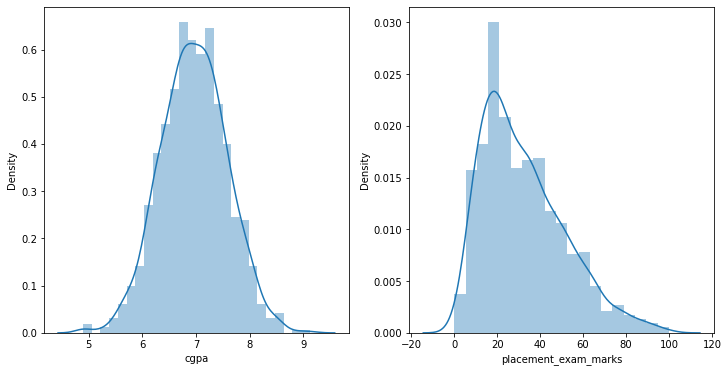

In [5]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

## as cgpa is normally distributed..so we can apply zscore here only

In [6]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [7]:
df['cgpa'].skew()

-0.014529938929314918

In [8]:
print("Mean value of cgpa", df['cgpa'].mean())
print("std value of cgpa", df['cgpa'].std())
print("Min value of cgpa", df['cgpa'].min())
print("Max value of cgpa", df['cgpa'].max())

Mean value of cgpa 6.96124000000001
std value of cgpa 0.6158978751323894
Min value of cgpa 4.89
Max value of cgpa 9.12


In [9]:
# finding the boundary values
print("Highest allowed", df['cgpa'].mean() + 3*df['cgpa'].std())
print("Lowest allowed", df['cgpa'].mean() - 3*df['cgpa'].std())

Highest allowed 8.808933625397177
Lowest allowed 5.113546374602842


In [10]:
#finding the outliers
df[df['cgpa'] > 8.80]

,cgpa,placement_exam_marks,placed
995,8.87,44.0,1
996,9.12,65.0,1


In [11]:
df[df['cgpa'] < 5.11]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [12]:
df[(df['cgpa']>8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


# Trimming

In [13]:
# trimming
new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]

In [14]:
new_df.shape

(995, 3)

In [19]:
# Approach 2
#calculating the ZScore

df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/ df['cgpa'].std()

In [21]:
df.sample(5)

,cgpa,placement_exam_marks,placed,cgpa_zscore
27,6.53,46.0,0,-0.700181
482,7.56,8.0,0,0.972174
69,7.41,44.0,0,0.728627
939,6.98,41.0,0,0.030460
286,6.29,58.0,1,-1.089856


In [22]:
df[df['cgpa_zscore'] >3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [23]:
df[df['cgpa_zscore'] <-3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [25]:
df[(df['cgpa_zscore'] >3) | (df['cgpa_zscore'] <-3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [30]:
new_df2 = df[(df['cgpa_zscore'] <3) & (df['cgpa_zscore'] >-3)]

In [31]:
new_df2

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


# capping

In [32]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [35]:
lower_limit

5.113546374602842

In [36]:
df['cgpa'] = np.where(df['cgpa']> upper_limit,
                     upper_limit,
                     np.where(df['cgpa']<lower_limit,
                             lower_limit,
                             df['cgpa']))

In [37]:
df.shape

(1000, 4)

In [40]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64